# Traitement de l'image
avec cours-gratuit.com

https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-les-bases-de-traitement-dimages-en-python-opencv

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. Manipuler les images

### 1.1 Importer l'image

In [233]:
image = cv2.imread("image001.jpg") # => envoie une image en BGR
print('classe: ', type(image))
print('type: ', image.dtype)
print('taille: ', image.shape)

classe:  <class 'numpy.ndarray'>
type:  uint8
taille:  (101, 174, 3)


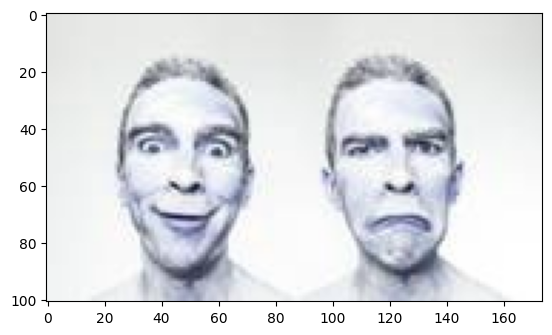

In [238]:
plt.imshow(image) #renvoie une image en RGB, il faut réorganiser les canaux

Image apparait au niveau du gris, car plt.imshow() affiche une image en RGB, alors que imread renvoie l'image en BGR. Il faut donc réorganiser les canaux de l'image pour pouvoir afficher l'image.

<p style='color: red'>Le couleur de l'image n'est pas la même, inversion entre les deux, ci-dessus et ci-dessous par rapport au tuto !</p>

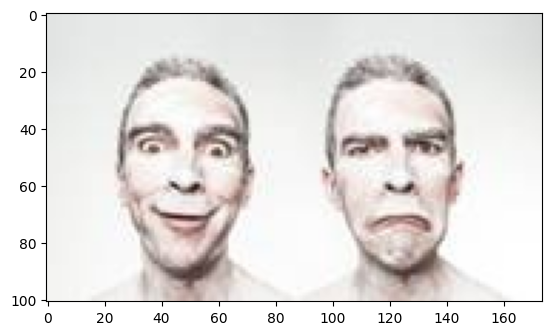

In [239]:
#b, g, r = cv2.split(image)
#image = cv2.merge([r, g, b])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [240]:
cv2.imwrite('image001.jpg', image)

True

### 1.2 Histogramme des pixels

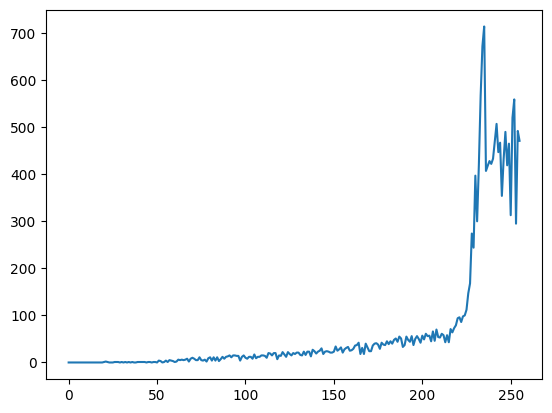

In [171]:
hist_image = cv2.calcHist([image], [1], None, [256], [0, 256])
plt.plot(hist_image)

### 1.3 Image en nuance de gris

taille de l'image en nuance de gris: (101, 174)


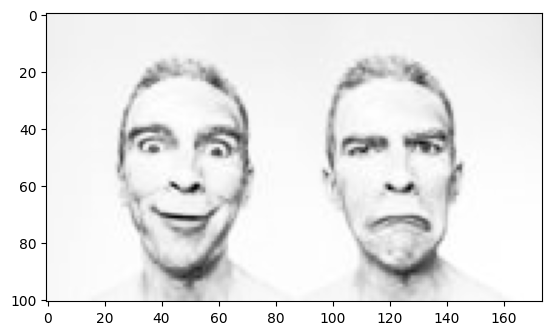

In [210]:
grey_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(grey_image, cmap='Greys_r')
print("taille de l'image en nuance de gris:", grey_image.shape)

### 1.4 Détection des bords

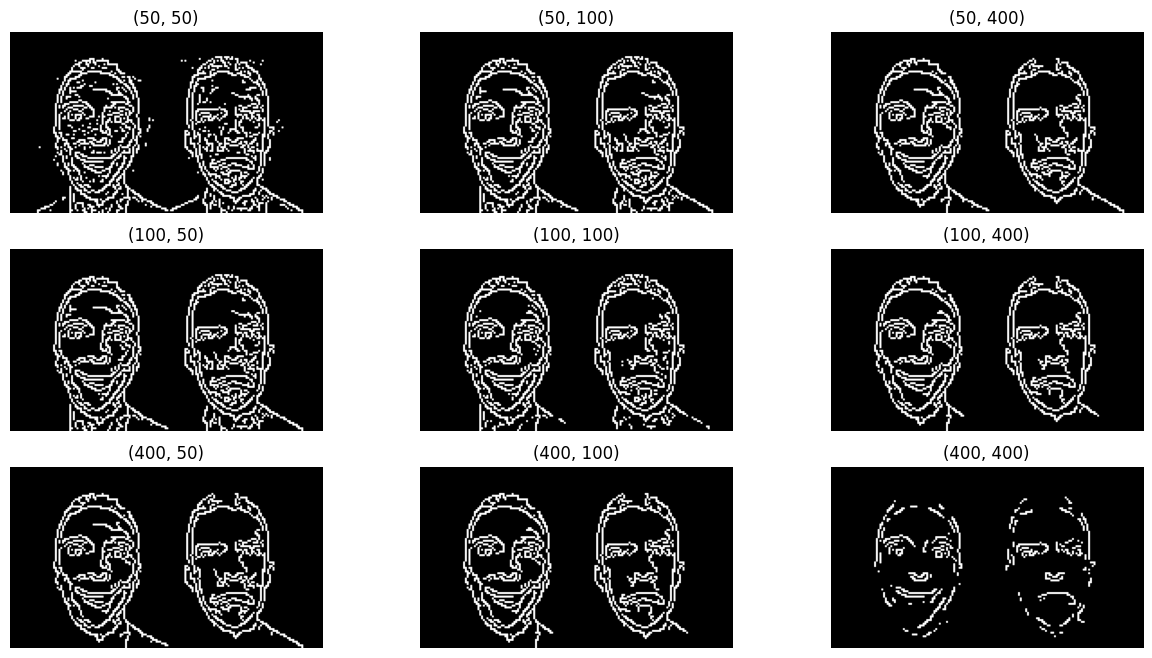

In [154]:
f, ax = plt.subplots(3, 3, figsize = (15, 8))
Val1 = [50, 100, 400]
Val2 = [50, 100, 400]
for i, val1 in enumerate(Val1):
    for j, val2 in enumerate(Val2):
        edge_image = cv2.Canny(image, val1, val2)
        ax[i][j].imshow(edge_image, cmap = 'Greys_r')
        ax[i][j].set_title((val1, val2))
        ax[i][j].set_axis_off()

### 1.5 Segmentation

Le but de la segmentation des images est d'étiqueter chaque pixel d'une image avec une classe correspondante. Il y a plusieurs façons de faire cela, la plus simple consiste à segmenter l’image en deux régions (image binaire). Cela revient à convertir l'image en nuance de gris, et fixer un seuil. Les pixels dont la valeur est supérieure au seuil sont traités comme appartenant à la première région, et les autres pixels (inférieur au seuil) à la deuxième région.

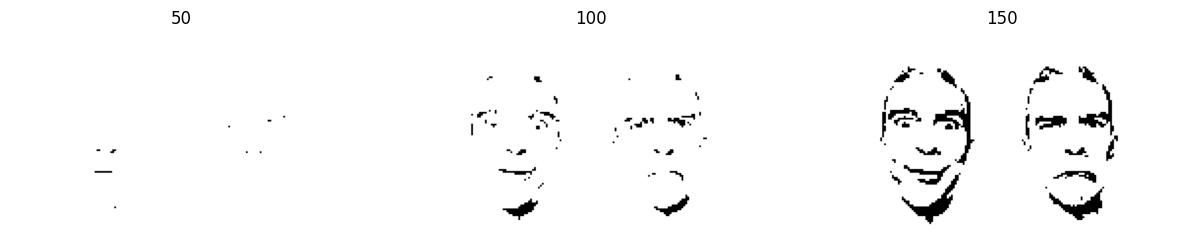

In [130]:
f, ax = plt.subplots(1, 3, figsize=(15, 8))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# les seuils de la segmentation
seuils = [50, 100, 150]
for i, seuil in enumerate(seuils):
    val, seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)
    ax[i].imshow(seg_image, cmap = 'Greys_r')
    ax[i].set_title(seuil)
    ax[i].set_axis_off()

## 2. Détection d'objets

Un algorithme de reconnaissance d'images (appelé classificateur d'images) prend une image (ou un morceau d'image) en entrée et essaye de prédire ce que l'image contient. En d'autres termes, la sortie est une étiquette de classe (par exemple "visage", "chat", "table", etc.). OpenCV contient des mécanismes permettant de faire de la détection d’objets. La technique utilisée est basée sur Haar cascade, qui est une approche d'apprentissage par machine. Vous pouvez créer votre propre classificateur HaaR pour n'importe quel objet, tout ce dont vous auriez besoin est de plusieurs images pour lancer un cycle d’apprentissage et ainsi générer votre propre classificateur HaaR.

In [132]:
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar_file)

Nous voulons maintenant essayer de détecter les deux visages dans l’image. Pour effectuer cette tache, faut d’abord convertir l’image test en nuance de gris, puis utiliser le classificateur que nous avons importé.

In [133]:
grey_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(grey_image)
print("Nombre de visages détecté dans l'image: {0}".format(len(faces)))

Nombre de visages détecté dans l'image: 2


In [134]:
#affiche les position des visages détectés
position_list = faces.tolist()
print(position_list[0])
print(position_list[1])

[18, 23, 59, 59]
[94, 24, 59, 59]


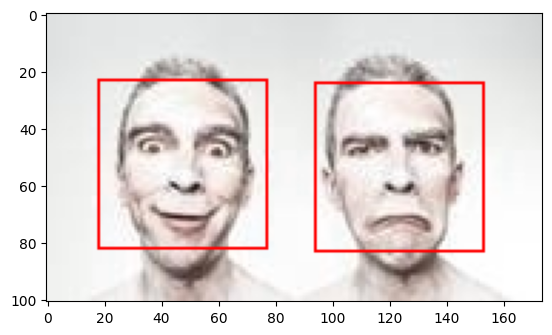

In [135]:
#ajout de rectangles autour des visages
for (x, y, w, h) in position_list:
    cv2.rectangle(image, (x, y), (x + w, y + h), color=255)
    plt.imshow(image)

In [154]:
#enregistrement de l'image
cv2.imwrite('visages.jpg', image)

True

## Exercices

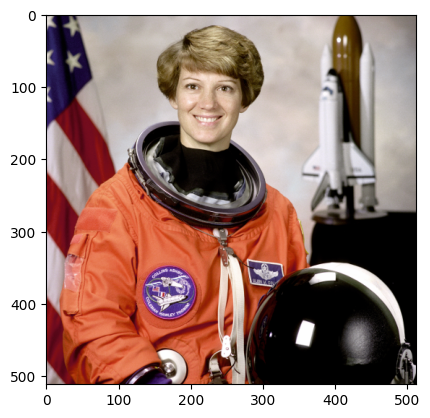

In [136]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
img_astro = data.astronaut()
plt.imshow(img_astro)

## 3.1. Exercice 1 :
Question : Générer une image pour chaque canal (rouge, vert, bleu), puis effectuer des segmentations avec les trois seuils suivant : [100, 150, 200]. Afficher le résultat.

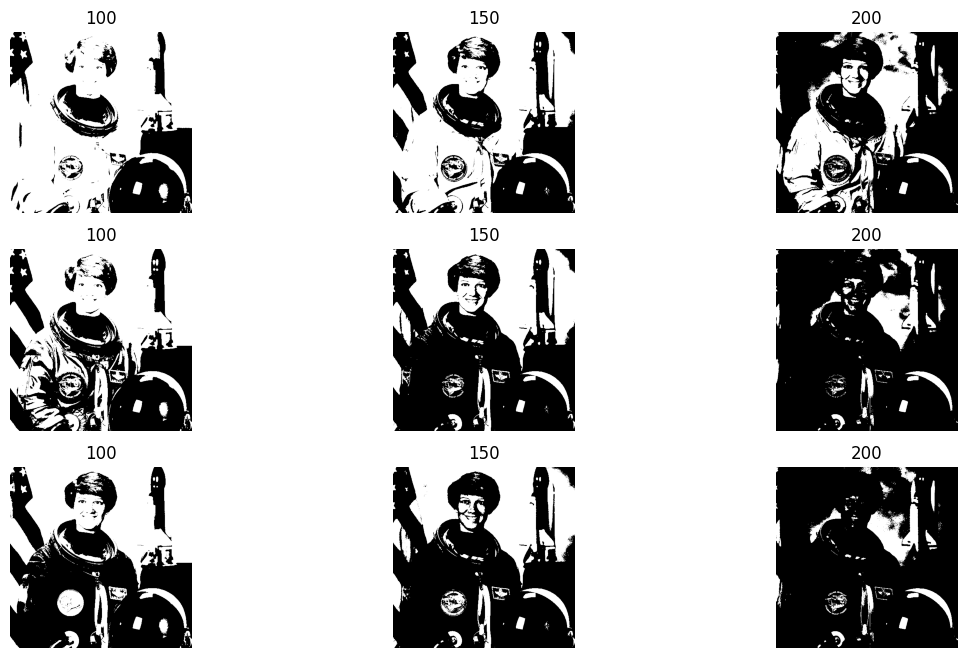

In [22]:
f, ax = plt.subplots(3, 3, figsize=(14, 8))
list_RGB = cv2.split(img_astro)

seuils = [100, 150, 200]
for i, seuil in enumerate(seuils):
    for j, img in enumerate(list_RGB):
        val, seg_image = cv2.threshold(img, seuil, 255, cv2.THRESH_BINARY)
        ax[j][i].imshow(seg_image, cmap='Greys_r')
        ax[j][i].set_title(seuil)
        ax[j][i].set_axis_off()


### 3.2. Exercice 2 :
Question : Détecter les yeux dans l’image avec OpenCV et dessiner un contour autour. Vous pouvez utiliser le classificateur de détection des yeux suivant : 'haarcascade_eye_tree_eyeglasses.xml'.

In [211]:
haar_file = 'haarcascade_eye_tree_eyeglasses.xml'
face_cascade = cv2.CascadeClassifier( cv2.data.haarcascades + haar_file )

img_grey = cv2.cvtColor(img_astro, cv2.COLOR_RGB2GRAY)
eyes = face_cascade.detectMultiScale(img_grey)

position_list_eye = eyes.tolist()

print(f"""Nombre de yeux détecté dans l’image: {len(faces)}""")

Nombre de yeux détecté dans l’image: 2


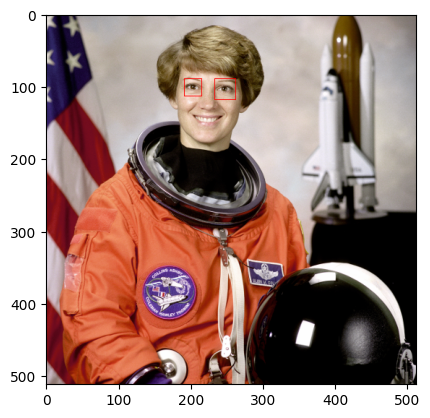

In [24]:
for (x, y, w, h) in position_list_eye:
    cv2.rectangle(img_astro, (x, y), (x + w, y + h), color = 255)
    plt.imshow(img_astro)

# Traitement de l'image
avec kongakura.com

https://www.kongakura.fr/article/OpenCV_Python_Tutoriel

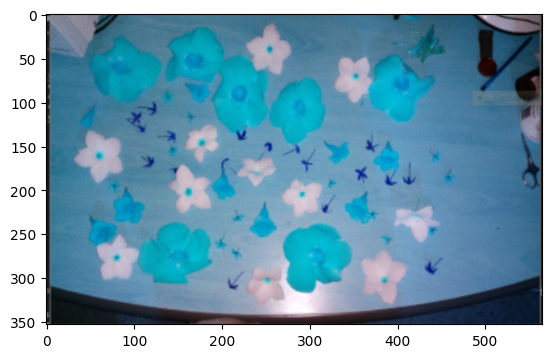

In [45]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('fleurs.png')
plt.imshow(img)

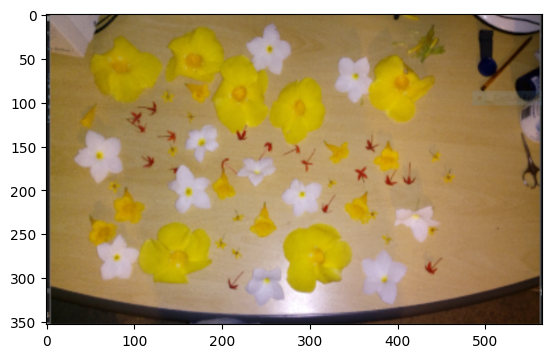

In [46]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
#cv2.imwrite('fleurs_RGB.png', img_RGB)

In [5]:
#img = cv2.imread('fleurs_RGB.png')
#plt.imshow(img)

## Les espaces de couleurs

In [6]:
'''
#permet d'ouvrir l'image dans une fenêtre indépendante, déconseillé avec notebook
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
cv2.waitKey(0) # le nombre en milliseconde correspond au temps que la fenêtre est en attente, avec 0, la fenêtre reste ouverte indéfiniment
cv2.destroyAllWindows()'''

"\n#permet d'ouvrir l'image dans une fenêtre indépendante, déconseillé avec notebook\ncv2.namedWindow('image', cv2.WINDOW_NORMAL)\ncv2.imshow('image', img)\ncv2.waitKey(0) # le nombre en milliseconde correspond au temps que la fenêtre est en attente, avec 0, la fenêtre reste ouverte indéfiniment\ncv2.destroyAllWindows()"

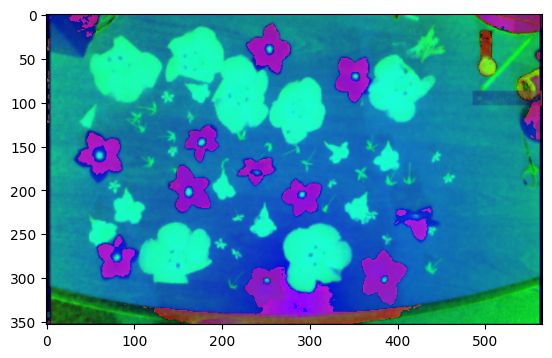

In [44]:
'''hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#permet de passer RGB à HSV
cv2.namedWindow('hsv', cv2.WINDOW_NORMAL)
cv2.imshow('hsv',hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()'''
img = cv2.imread('fleurs.png')
img_hsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

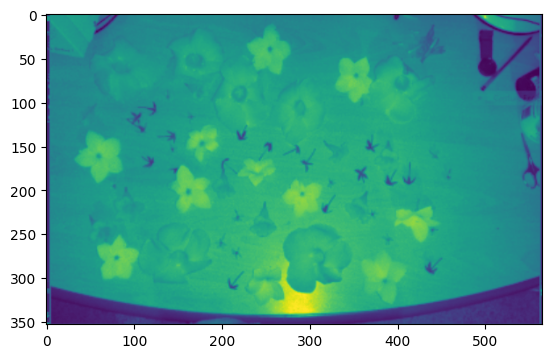

In [43]:
'''gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#au niveau du gris
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)
cv2.imshow('gray',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()'''
img = cv2.imread('fleurs.png')
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

## La segmentation

La segmentation permet d’isoler les différents objets présents dans une image.

Il existe différentes méthodes de segmentation : la classification, le clustering, les level-set, graph-cut, etc ....

Mais la plus simple est le seuillage, c’est pourquoi je vais te parler uniquement de celle-ci dans cette seconde partie.

Le seuillage est une opération qui permet de transformer une image en niveau de gris en image binaire (noir et blanc),

l'image obtenue est appelée masque binaire.

### Le seuillage manuel

150.0


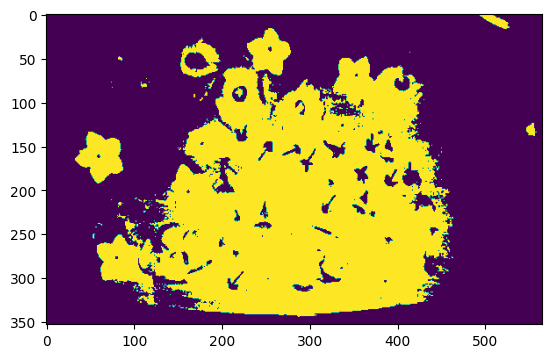

In [27]:
'''gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,th= cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',th)
cv2.waitKey(0)
cv2.destroyAllWindows()'''
img = cv2.imread('fleurs.png')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,th= cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
print(ret)
plt.imshow(th)

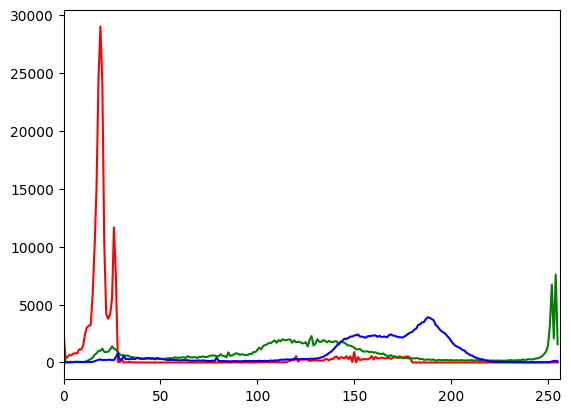

In [28]:
img = cv2.imread('fleurs.png')
#RGB -> HSV.
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#Déclaration des couleurs des courbes
color = ('r','g','b')
#Déclaration des noms des courbes.
labels = ('h','s','v')
#Pour col allant r à b et pour i allant de 0 au nombre de couleurs
for i,col in enumerate(color):
    #Hist prend la valeur de l'histogramme de hsv sur la canal i.
    hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
    # Plot de hist.
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])